In [127]:
import numpy as np
import matplotlib.pyplot as plt

class Adam():
    #https://pytorch.org/docs/stable/generated/torch.optim.Adam.html

    def __init__(self, thetas, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.gamma=lr
        self.beta1=beta1
        self.beta2=beta2
        self.epsilon=epsilon
        self.beta1t=1.
        self.beta2t=1.
        self.m=[]
        self.v=[]
        for i,theta in enumerate(thetas):
            self.m.append(np.zeros_like(theta))
            self.v.append(np.zeros_like(theta))
        

    def step(self, g):
        self.beta1t *= self.beta1
        self.beta2t *= self.beta2
        result = []
        for i in range(len(g)):
            self.m[i] = self.beta1 * self.m[i] + (1.-self.beta1)*g[i]
            self.v[i] = self.beta2 * self.v[i] + (1.-self.beta2)*np.square(g[i])
            mhat = self.m[i]/(1.-self.beta1t)
            vhat = self.v[i]/(1.-self.beta2t)
            result.append(self.gamma * mhat/(np.sqrt(vhat)+self.epsilon))
        return result
    


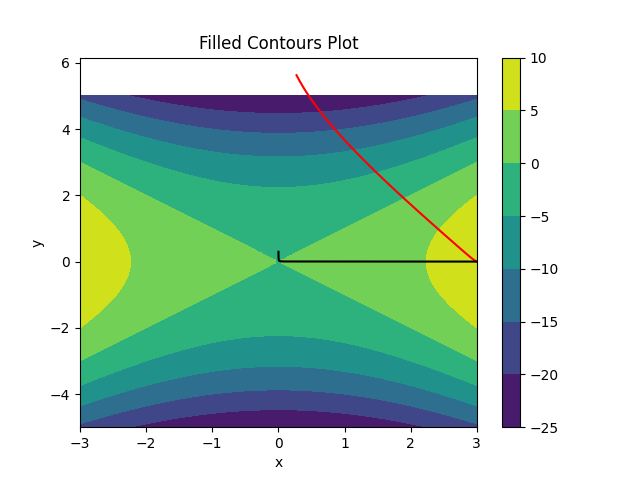

In [128]:
def f(x):
    return x[0]**2 - x[1]**2

xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)  
X, Y = np.meshgrid(xlist, ylist)
Z = X**2 - Y**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

points=[np.array([3.,0.0001])]
o = Adam([points[0]])
for i in range(4000):
    theta=points[i]
    g=np.zeros_like(theta)
    g[0]=2.*theta[0]
    g[1]=-2*theta[1]
    res=o.step([g])
    points.append(theta-res[0])

x,y=zip(*points)
plt.plot(x,y,color='red') 


points=[np.array([3.,0.0001])]
for i in range(4000):
    theta=points[i]
    g=np.zeros_like(theta)
    g[0]=2.*theta[0]
    g[1]=-2*theta[1]
    points.append(theta-0.001*g)

x,y=zip(*points)
plt.plot(x,y,color='black') 
plt.show()


In [98]:
def f1(x,y):
    return -torch.sin(math.pi*x)/(math.pi*x)-torch.sin(math.pi*y)/(math.pi*y)+(x**2+y**2)/7.

def f2(x,y):
    return x**2 - y**2


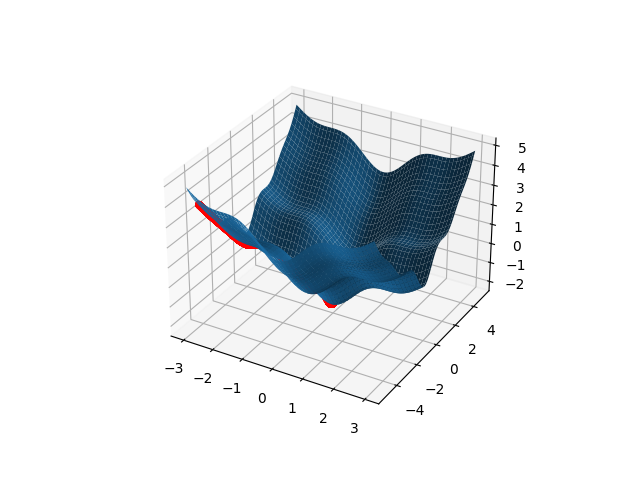

In [182]:
%matplotlib widget


xlist = torch.tensor(np.linspace(-3.0, 3.0, 100), requires_grad=True)
ylist = torch.tensor(np.linspace(-5.0, 5.0, 100), requires_grad=True)
X,Y = torch.meshgrid(xlist,ylist, indexing='ij')

Z=f1(X,Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X.detach().numpy(), Y.detach().numpy(), Z.detach().numpy())

xy = torch.tensor([-3.,-4.], requires_grad=True)
z = f1(xy[0], xy[1])
o = Adam(xy.detach())
points_x=[xy[0].item()]
points_y=[xy[1].item()]
points_z=[z.item()]

for i in range(10000):
    if xy.grad is not None: xy.grad.data.zero_()
    z.backward()
    g = xy.grad
    d = o.step([g])
    with torch.no_grad():
        xy -= d[0]
    z=f1(xy[0], xy[1])   
    points_x.append(xy[0].item())
    points_y.append(xy[1].item())
    points_z.append(z.item())
    
ax.scatter3D(points_x, points_y, points_z, color='red')



#plt.show()  
    


In [170]:
points(x
